## 1. Importing libraries

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 2. Importing datasets

In [2]:
#Reading in data 
## Testing data

#Confirmed provincial cummulative  tests         
df5 = pd.read_csv('./../data/raw/owid-covid-data.csv', sep= ',')
sa_cumm=df5[df5['location'] == 'South Africa']

#Confirmed national cummulative confirmed positive tests         
df6 = pd.read_csv('./../data/raw/time_series_covid19_confirmed_global.csv', sep= ',')
sa_con=df6[df6['Country/Region'] == 'South Africa']

#Confirmed national cummulative confirmed deaths         
df7 = pd.read_csv('./../data/raw/time_series_covid19_deaths_global.csv', sep= ',')
sa_death=df7[df7['Country/Region'] == 'South Africa']

#Confirmed national cummulative confirmed revovered tests         
df8 = pd.read_csv('./../data/raw/time_series_covid19_recovered_global.csv', sep= ',')
sa_recovd=df8[df8['Country/Region'] == 'South Africa']

#National density
sa_dens = pd.read_csv('./../data/raw/data.csv')
sa_dens=sa_dens[sa_dens['name'] == 'South Africa']

#Number of hospital beds per province
hosp_beds = pd.read_csv('./../data/raw/hospital_beds.csv', sep = ';')

#List of hospitals in each povince
url="https://raw.githubusercontent.com/dsfsi/covid19za/master/data/health_system_za_public_hospitals.csv"
hosp_list=pd.read_csv(url)

## 3.EDA

In [3]:
#Dropping unwanted columns

#Confirmed national cummulative tests conducted
sa_dens = sa_dens.drop(['rank'], axis=1)

#List of hospitals
hosp_list = hosp_list.drop(['ID','Lat', 'Long','district','district_estimated_population','subdistrict', 'service_offered_by_hospital', 'size_hospital','number_of_beds','number_of_practitioners','webpage','geo_subdivision'], axis=1)

#Confirmed national cummulative tests conducted
sa_cumm = sa_cumm.drop(['iso_code'], axis=1)

#Confirmed national cummulative confirmed positive tests 
sa_con = sa_con.drop(['Lat', 'Long','Province/State'], axis=1)

#Confirmed national cummulative confirmed deaths 
sa_death = sa_death.drop(['Lat', 'Long','Province/State'], axis=1)

#Confirmed national cummulative confirmed recovered
sa_recovd = sa_recovd.drop(['Lat', 'Long','Province/State'], axis=1)


# Extracting relevant columns
sa_cumm= sa_cumm[['date','new_cases','new_deaths']]

In [4]:
#Cleaning up columns

#Creating date column for sa_con dataframe
dfc1 = sa_con.melt(id_vars=["Country/Region"], 
                    var_name="Date",
                    value_name="cases")
dfc1 = dfc1.rename({'Country/Region': 'country', 'Date': 'date'}, axis=1)
sa_con = dfc1
sa_con['date'] = pd.to_datetime(sa_con['date'])

#Creating date column for sa_death dataframe
dfc2 = sa_death.melt(id_vars=["Country/Region"], 
                    var_name="Date",
                    value_name="cases")
dfc2 = dfc2.rename({'Country/Region': 'country', 'Date': 'date'}, axis=1)
sa_death = dfc2
sa_death['date'] = pd.to_datetime(sa_death['date'])

#Creating date column for sa_recovd dataframe
dfc3 = sa_recovd.melt(id_vars=["Country/Region"], 
                    var_name="Date",
                    value_name="cases")
dfc3 = dfc3.rename({'Country/Region': 'country', 'Date': 'date'}, axis=1)
sa_recovd = dfc3

#converting to datetime
sa_recovd['date'] = pd.to_datetime(sa_recovd['date'])
sa_cumm['date'] = pd.to_datetime(sa_cumm['date'])

#converting all nan values to 0
sa_cumm = sa_cumm.fillna(0)

In [5]:
#Renaming testing columns 

sa_con.rename(columns={'cases':'confirmed_cases'}, inplace=True)
sa_death.rename(columns={'cases':'death_cases'}, inplace=True)
sa_recovd.rename(columns={'cases':'recovered_cases'}, inplace=True)

In [6]:
#Merging South Africa's confirmed, death, recovered cases and new cases for each

sa_testing=pd.merge(sa_con, sa_death, how='left')
sa_testing=pd.merge(sa_testing, sa_recovd, how='left')
sa_testing=pd.merge(sa_testing, sa_cumm, how='left')

# Removing nans in dataframe
sa_testing= sa_testing.fillna(0)
sa_testing.head(1)

,country,date,confirmed_cases,death_cases,recovered_cases,new_cases,new_deaths
0,South Africa,2020-01-22,0,0,0,0.0,0.0


##  4.  Statistical analysis

### 4.1 Testing dataset

In [7]:
#Looking closely into the national testing dataframe

# display of latest figures
totl_con = sa_testing['confirmed_cases'].iloc[-1]
totl_death = sa_testing['death_cases'].iloc[-1]
totl_recovd = sa_testing['recovered_cases'].iloc[-1]
new_case = sa_testing['new_cases'].iloc[-1]
new_deaths = sa_testing['new_deaths'].iloc[-1]
date = sa_testing['date'].iloc[-1]

print('Date:{} TOTAL CASES:{} TOTAL DEATH:{} TOTAL RECOVERED:{} NEW CASES:{}' .format(date,totl_con,totl_death,totl_recovd,new_case), sep='nl')


Date:2020-05-11 00:00:00 TOTAL CASES:10652 TOTAL DEATH:206 TOTAL RECOVERED:4357 NEW CASES:595.0


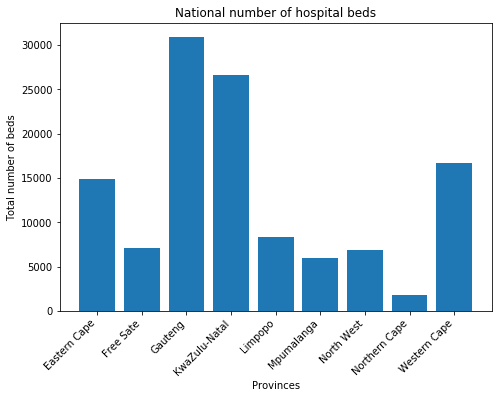

In [8]:
#Looking closely into the national testing dataframe

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar('Province','Total no of beds', data =hosp_beds )
ax.set_title('National number of hospital beds')
ax.set_xlabel('Provinces')
ax.set_ylabel('Total number of beds')
fig.autofmt_xdate(rotation=45);


In [9]:
sa_dens

,name,density,densityMi,pop2020,area
160,South Africa,48.5724,125.8025,59308.69,1221037.0


In [12]:
#Looking closely into the national density dataframe

# display of latest figures
density = sa_dens['density'].iloc[-1]
dens_mi = sa_dens['densityMi'].iloc[-1]
pop_2020 = sa_dens['pop2020'].iloc[-1]
area = sa_dens['area'].iloc[-1]

print('Population density:{} Population:{} Area(km2):{} ' .format(density,pop_2020,area), sep='nl')


Population density:48.5724 Population:59308.69 Area(km2):1221037.0 
